In [1]:
import pandas as pd
import os
import glob
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#def calculating_null_values_per_column(data: pd.DataFrame, label: str) -> dict:
#    """
#    Calculates the number of null values per column in a dataframe and presents the result as a dictionary
#    """
#    null_values_dict = {}

#    for i in data.columns:
#        null_values_dict[i] = data[i].isna().sum()

#    print(f'The number of null values per column in the {label} is the following: ' + str(null_values_dict))
    
#    return null_values_dict

In [3]:
# Moving csv files to their own folder

if os.path.exists("./data/csv/"):
    pass
else:
    source_folder = "./"

    destination_folder = os.path.join(source_folder, "data/csv")

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    for filename in os.listdir("./csv/"):
        os.rename(os.path.join(source_folder, filename), os.path.join(destination_folder, filename))

In [4]:
csv_files = os.listdir("./data/original/")
print(csv_files)

['holidays_events.csv', 'oil.csv', 'sample_submission.csv', 'stores.csv', 'test.csv', 'train.csv', 'transactions.csv']


In [5]:
dict_of_csvs = {}

for i in csv_files:
    dict_of_csvs[i[:-4]] = pd.read_csv("./data/original/" + i)

In [6]:
print(csv_files)

['holidays_events.csv', 'oil.csv', 'sample_submission.csv', 'stores.csv', 'test.csv', 'train.csv', 'transactions.csv']


In [7]:
list(dict_of_csvs.keys())

['holidays_events',
 'oil',
 'sample_submission',
 'stores',
 'test',
 'train',
 'transactions']

In [8]:
dict_of_csvs['holidays_events'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [9]:
dict_of_csvs['holidays_events'].head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [10]:
dict_of_csvs['holidays_events'].describe(include=['object', 'bool'])

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


In [11]:
dict_of_csvs['holidays_events']['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [12]:
dict_of_csvs['holidays_events']['type'].value_counts(normalize=True)

Holiday       0.631429
Event         0.160000
Additional    0.145714
Transfer      0.034286
Bridge        0.014286
Work Day      0.014286
Name: type, dtype: float64

In [13]:
dict_of_csvs['holidays_events']['locale'].value_counts()

National    174
Local       152
Regional     24
Name: locale, dtype: int64

In [14]:
dict_of_csvs['holidays_events']['locale'].value_counts(normalize=True)

National    0.497143
Local       0.434286
Regional    0.068571
Name: locale, dtype: float64

In [15]:
dict_of_csvs['holidays_events']['locale_name'].value_counts()

Ecuador                           174
Quito                              13
Riobamba                           12
Guaranda                           12
Latacunga                          12
Ambato                             12
Guayaquil                          11
Cuenca                              7
Ibarra                              7
Salinas                             6
Loja                                6
Santa Elena                         6
Santo Domingo de los Tsachilas      6
Quevedo                             6
Manta                               6
Esmeraldas                          6
Cotopaxi                            6
El Carmen                           6
Santo Domingo                       6
Machala                             6
Imbabura                            6
Puyo                                6
Libertad                            6
Cayambe                             6
Name: locale_name, dtype: int64

In [16]:
dict_of_csvs['oil'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [17]:
dict_of_csvs['oil'].head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [18]:
dict_of_csvs['stores'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [19]:
dict_of_csvs['stores'].head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [20]:
dict_of_csvs['stores'].describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [21]:
dict_of_csvs['stores'].describe(include=['object'])

,city,state,type
count,54,54,54
unique,22,16,5
top,Quito,Pichincha,D
freq,18,19,18


In [22]:
dict_of_csvs['stores']['city'].value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

In [23]:
dict_of_csvs['stores']['city'].value_counts(normalize=True)

Quito            0.333333
Guayaquil        0.148148
Cuenca           0.055556
Santo Domingo    0.055556
Manta            0.037037
Latacunga        0.037037
Machala          0.037037
Ambato           0.037037
Quevedo          0.018519
Esmeraldas       0.018519
Loja             0.018519
Libertad         0.018519
Playas           0.018519
Daule            0.018519
Babahoyo         0.018519
Salinas          0.018519
Puyo             0.018519
Guaranda         0.018519
Ibarra           0.018519
Riobamba         0.018519
Cayambe          0.018519
El Carmen        0.018519
Name: city, dtype: float64

In [24]:
dict_of_csvs['transactions'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [25]:
dict_of_csvs['transactions'].head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [26]:
train_data = pd.read_csv('./data/original/train.csv')
train_data.drop(train_data.columns[0], axis=1, inplace=True)
train_data.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [27]:
train_data['sales'].mean()

357.77574911261894

In [28]:
train_data[train_data['store_nbr'] == 1].mean()

C:\Users\Alex\AppData\Local\Temp\ipykernel_14104\3633517911.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data[train_data['store_nbr'] == 1].mean()


store_nbr        1.000000
sales          254.534889
onpromotion      2.483625
dtype: float64

In [29]:
train_data[train_data['store_nbr'] == 2].mean()

C:\Users\Alex\AppData\Local\Temp\ipykernel_14104\3317690938.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data[train_data['store_nbr'] == 2].mean()


store_nbr        2.000000
sales          387.918172
onpromotion      2.845840
dtype: float64

In [30]:
train_data[train_data['store_nbr'] == 3]['sales'].mean()

908.4054953048657

In [31]:
train_data['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [32]:
train_data.describe()

,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02,2.602770e+00
std,1.558579e+01,1.101998e+03,1.221888e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00
50%,2.750000e+01,1.100000e+01,0.000000e+00
75%,4.100000e+01,1.958473e+02,0.000000e+00
max,5.400000e+01,1.247170e+05,7.410000e+02


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 114.5+ MB


In [36]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['DayOfWeek'] = train_data['date'].dt.dayofweek
train_data[['date', 'DayOfWeek']].drop_duplicates()

,date,DayOfWeek
0,2013-01-01,1
1782,2013-01-02,2
3564,2013-01-03,3
5346,2013-01-04,4
7128,2013-01-05,5
...,...,...
2991978,2017-08-11,4
2993760,2017-08-12,5
2995542,2017-08-13,6
2997324,2017-08-14,0


In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
 5   DayOfWeek    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [ ]:
train_data.describe(include=['object'])

In [ ]:
train_data['family'].value_counts()

In [ ]:
train_data['family'].value_counts(normalize=True)

In [ ]:
train_data['store_nbr'].value_counts(normalize=True)

In [ ]:
columns_to_show = ['sales', 'onpromotion']

train_data.groupby(['store_nbr'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

In [ ]:
pd.crosstab(train_data['store_nbr'], train_data['family'])

In [ ]:
pd.crosstab(train_data['store_nbr'], train_data['family'], normalize=True)

In [ ]:
train_data.shape

In [ ]:
# Let´s analyze the gaps in the training data
msno.bar(train_data, figsize = (16,5),color = "purple")
plt.show()

In [ ]:
# Let's analyze the gaps in the oil data
msno.bar(dict_of_csvs['oil'], figsize = (16,5),color = "orange")
plt.show()

In [ ]:
dict_of_csvs['oil'].shape

In [ ]:
dict_of_csvs['holidays_events'].shape

In [ ]:
# Let´s analyze the gaps in the holidays data.
msno.bar(dict_of_csvs['holidays_events'], figsize = (16,5),color = "orange")
plt.show()

In [ ]:
dict_of_csvs['stores'].shape

In [ ]:
# Let´s analyze the gaps in the stores data.
msno.bar(dict_of_csvs['stores'], figsize = (16,5),color = "orange")
plt.show()

In [ ]:
dict_of_csvs['transactions'].shape

In [ ]:
# Let´s analyze the gaps in the transactions data.
msno.bar(dict_of_csvs['transactions'], figsize = (16,5),color = "orange")
plt.show()

In [38]:
numeric_columns = train_data.select_dtypes(include='number').columns
corr_matrix = train_data[numeric_columns].corr()

<Axes: >

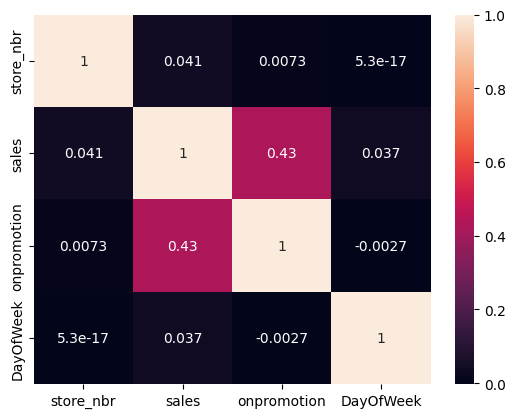

In [39]:
sns.heatmap(corr_matrix, annot=True)